# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement-2 Logistic Regression and LDA

<font color=darkblue>You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages. </font>
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Dictionary:

![alt text](Data-Dictionary.png)

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.1	Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns 
from pandas_profiling import ProfileReport #Automate EDA

# For Visualisation
# importing ploting libraries
import matplotlib.pyplot as plt
# import matplotlib.style
# plt.style.use('classic')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid',
        font_scale = 1.5, color_codes=True)

# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

#To Split data
from sklearn.model_selection import train_test_split,GridSearchCV

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

# Import Linear discriminant analysis machine learning library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
#To check Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read Data
agency_df = pd.read_csv('Holiday_Package.csv')

In [3]:
# Check head of the data
agency_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
# Drop Unwanted column from the dataset
agency_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Check head of the data
agency_df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [6]:
# Check tail of the data
agency_df.tail(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,no,66900,35,10,1,1,yes
863,no,35290,51,9,0,1,yes
864,no,25527,41,5,1,0,yes
865,yes,44057,35,9,0,2,yes
866,yes,22643,42,14,0,0,yes
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [7]:
# To generate Report assign it to new variable
profile = ProfileReport(agency_df,title='Holiday_Package',explorative=True)

In [8]:
# To save the report.
profile.to_file('Package.html')

In [9]:
# Data Inspection (Dimension)
row, col = agency_df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 872 Observations and 7 variables in the dataset


In [10]:
# Data Structure
agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [11]:
agency_df['educ']=agency_df['educ'].astype('object')
agency_df['no_young_children']=agency_df['no_young_children'].astype('object')
agency_df['no_older_children']=agency_df['no_older_children'].astype('object')

In [12]:
agency_df.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                 object
no_young_children    object
no_older_children    object
foreign              object
dtype: object

* **From the given dataset we have 6 Independent Variables and one Dependent/Target Variable** 
* **Out of 6 independent variables, we have 2 continuous variables and 4 categorical variables**

In [13]:
# Number Summary
round(agency_df.describe(include='all'),5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.00000,872.00000,872.0,872.0,872.0,872
unique,2,NaN,NaN,20.0,4.0,7.0,2
top,no,NaN,NaN,8.0,0.0,0.0,no
freq,471,NaN,NaN,157.0,665.0,393.0,656
mean,NaN,47729.17202,39.95528,NaN,NaN,NaN,NaN
std,NaN,23418.66853,10.55167,NaN,NaN,NaN,NaN
min,NaN,1322.00000,20.00000,NaN,NaN,NaN,NaN
25%,NaN,35324.00000,32.00000,NaN,NaN,NaN,NaN
50%,NaN,41903.50000,39.00000,NaN,NaN,NaN,NaN
75%,NaN,53469.50000,48.00000,NaN,NaN,NaN,NaN


In [14]:
#skewness of the data
agency_df[['Salary','age']].skew()

Salary    3.103216
age       0.146412
dtype: float64

In [15]:
# Check for Missing Values
agency_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

# Count of Opted and Not Opted in the Target Column

In [16]:
# Let us look at the target column which is 'Holliday_Package' to understand how the data is distributed amongst the various values
agency_df.groupby(['Holliday_Package']).count()

# Most of the employee did not opt for holliday package. The ratio is almost 1:1 in favor of both yes and no. 
# The model's ability to predict class no will be almost similar to predicting yes. 

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


In [17]:
agency_df.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Geting unique counts of all Objects

In [18]:
# Geting unique counts of all Categorical Variables
for column in agency_df[['Holliday_Package','educ', 'no_young_children','no_older_children','foreign']]:
    print(column.upper(),': ',agency_df[column].nunique())
    print(agency_df[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




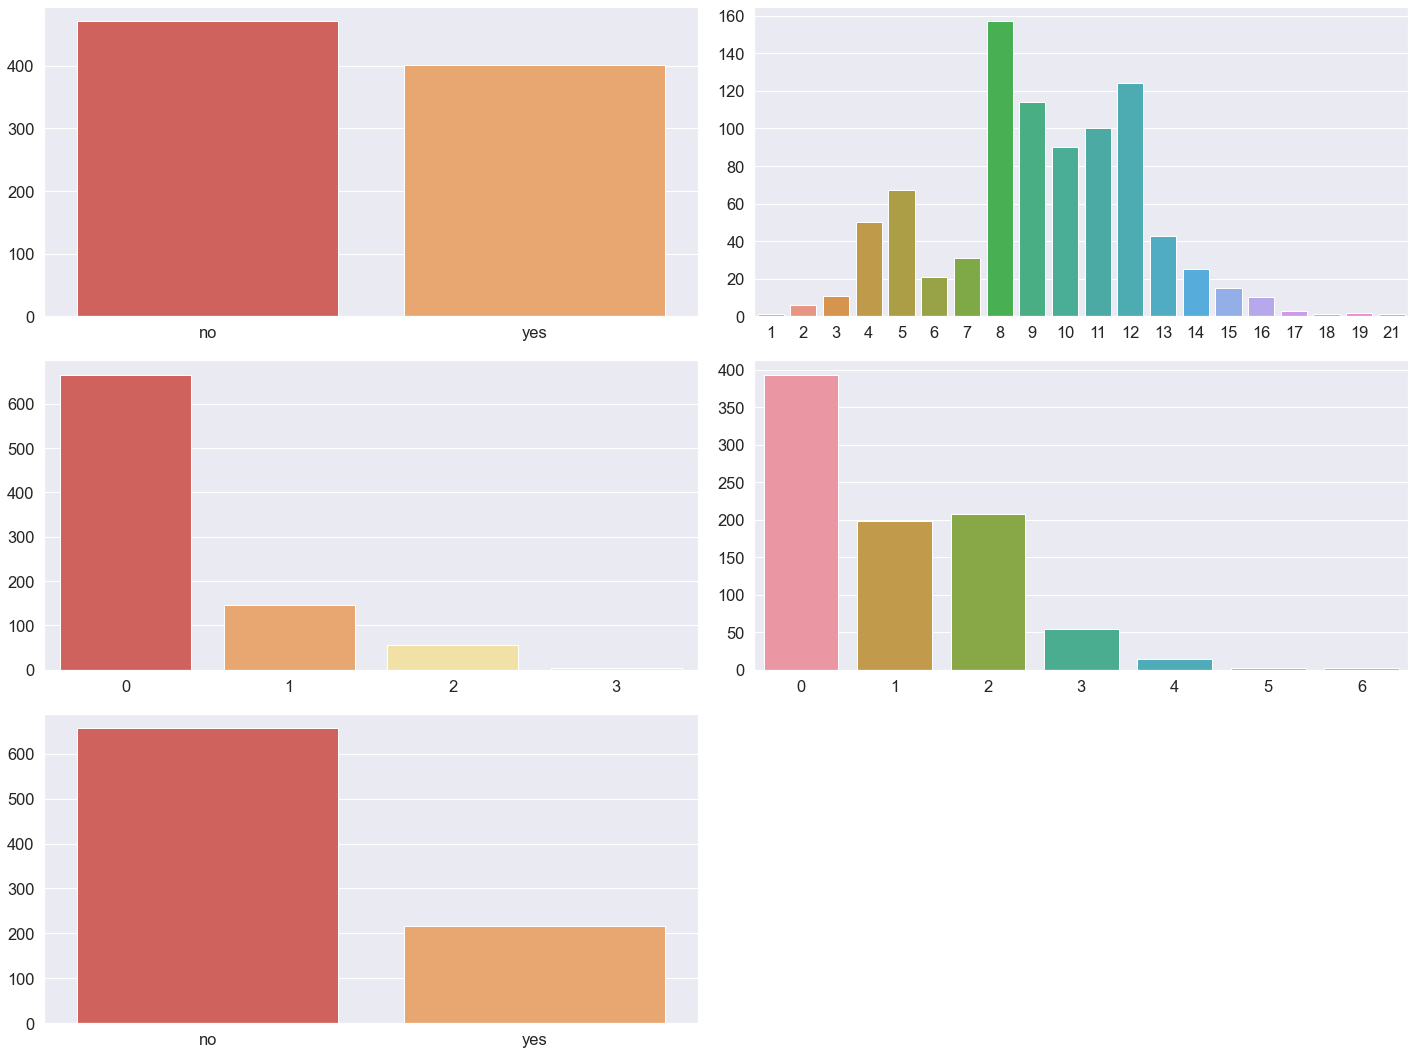

In [19]:
## Plot the Class count for each Nominal variable
## construct barplot for Nominal variables:

catg_plot=agency_df[['Holliday_Package','educ', 'no_young_children','no_older_children','foreign']]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(catg_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.barplot(catg_plot[catg_plot.columns[i]].value_counts().index,catg_plot[catg_plot.columns[i]].value_counts().values)
    plt.tight_layout()

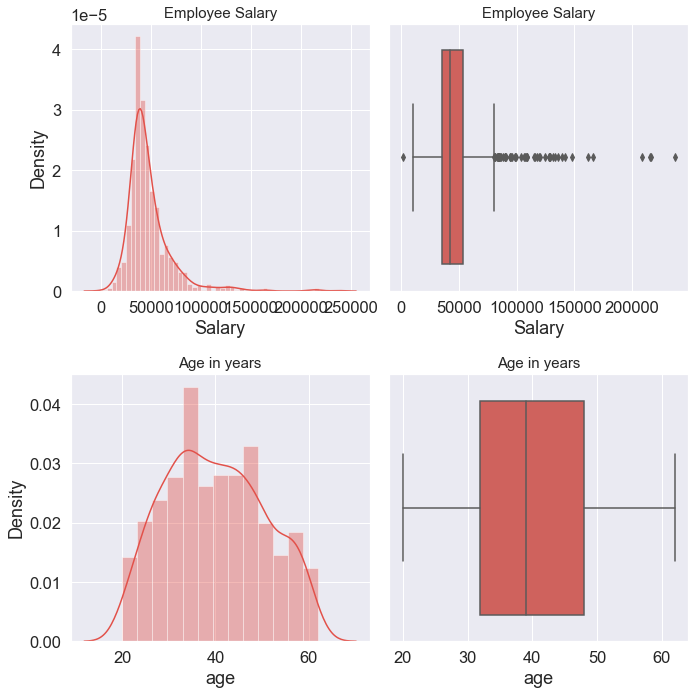

In [20]:
## Univariate Analysis using Histplot and Boxplot:
## Identify outliers for a given dataset:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)

a = sns.distplot(agency_df['Salary'] , ax=axes[0][0])
a.set_title("Employee Salary",fontsize=15)

a = sns.boxplot(agency_df['Salary'] , ax=axes[0][1])
a.set_title("Employee Salary",fontsize=15)

a = sns.distplot(agency_df['age'] , ax=axes[1][0])
a.set_title("Age in years",fontsize=15)

a = sns.boxplot(agency_df['age'] , ax=axes[1][1])
a.set_title("Age in years",fontsize=15)

plt.tight_layout()
plt.show()

* **Salary column has lot of outliers.** 

### Outlier treatment

In [21]:
Q1 = agency_df['Salary'].quantile(0.25)
Q3 = agency_df['Salary'].quantile(0.75)
IQR = Q3-Q1
LL = Q1 - (1.5*IQR)
UL = Q3 + (1.5*IQR)
print(LL)
print(UL)

8105.75
80687.75


In [22]:
agency_df['Salary'] = np.where(agency_df['Salary'] > 80687.75, 80687.75, agency_df['Salary'])
agency_df['Salary'] = np.where(agency_df['Salary'] < 8105.75, 8105.75, agency_df['Salary'])

<AxesSubplot:xlabel='Salary'>

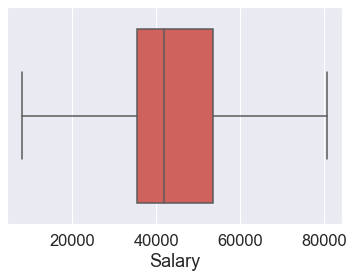

In [23]:
sns.boxplot(agency_df['Salary'])

# Bivariate Analysis 

<AxesSubplot:xlabel='Salary', ylabel='age'>

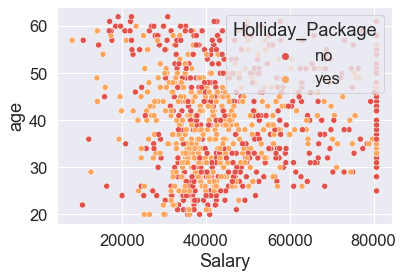

In [24]:
sns.scatterplot(data=agency_df,x='Salary',y='age',hue='Holliday_Package')

* **For a given dataset, 2 continuous numerical variable 'age and Salary do not have any correlation, seems to be a weak predictor.**

<AxesSubplot:xlabel='educ', ylabel='age'>

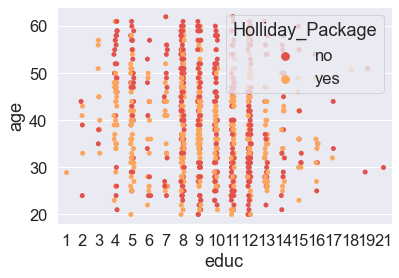

In [25]:
sns.stripplot(y=agency_df['age'], x= agency_df['educ'],hue=agency_df['Holliday_Package']) ### Concentration of observations

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

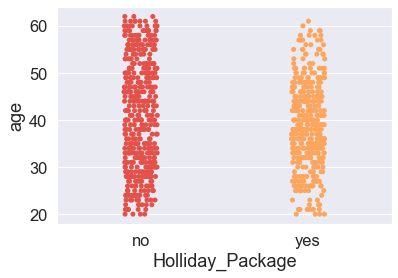

In [26]:
sns.stripplot(y=agency_df['age'], x= agency_df['Holliday_Package']) ### Concentration of observations

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

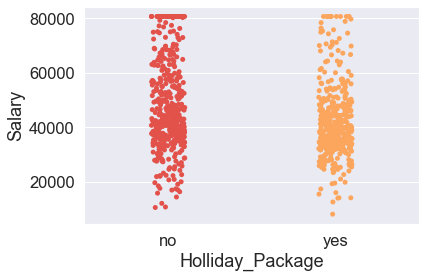

In [27]:
sns.stripplot(y=agency_df['Salary'], x= agency_df['Holliday_Package']) ### Concentration of observations

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.2	Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [28]:
for feature in agency_df.columns: 
    if agency_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(agency_df[feature].unique()))
        print(pd.Categorical(agency_df[feature].unique()).codes)
        agency_df[feature] = pd.Categorical(agency_df[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: educ
[8, 9, 11, 12, 14, ..., 21, 2, 18, 3, 1]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 21]
[ 7  8 10 11 13 18  9 12 14  3 16  6 15  5  4 19  1 17  2  0]


feature: no_young_children
[1, 0, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
[1 0 2 3]


feature: no_older_children
[1, 0, 2, 4, 3, 5, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
[1 0 2 4 3 5 6]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [29]:
# Copy all the predictor variables into X dataframe
X = agency_df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = agency_df['Holliday_Package']

In [30]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [31]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [32]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [33]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

### Logistic Regression Model

In [34]:
# Fit the Logistic Regression model
LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True, n_jobs=2,tol=0.0001)
LR.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [35]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = LR.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = LR.predict(X_test)

In [36]:
### Getting the Predicted Classes and Probs
# Training Data Probability Prediction
ytrain_predict_prob=LR.predict_proba(X_train)

# Test Data Probability Prediction
ytest_predict_prob=LR.predict_proba(X_test)

pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677836,0.322164
1,0.534881,0.465119
2,0.691836,0.308164
3,0.488431,0.511569
4,0.571883,0.428117


# LDA

In [37]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Prediction

In [38]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA.predict(X_test)

In [39]:
# Training Data Probability Prediction
pred_prob_train = LDA.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA.predict_proba(X_test)

pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.677836,0.322164
1,0.534881,0.465119
2,0.691836,0.308164
3,0.488431,0.511569
4,0.571883,0.428117


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.3	Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Model Evaluation-Logistic Regression

#### Training set - LR

Accuracy for Logistic Regression model on Training set is 
 0.667


Classification report for Logistic Regression model on Training set is 
               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



Confusion Matrix for Logistic Regression model on Training set is


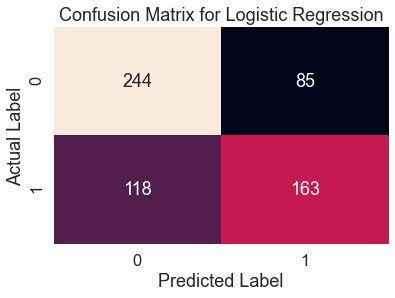

LR_train_precision  0.66
LR_train_recall  0.58
LR_train_f1  0.62


In [40]:
models_names={LR:'Logistic Regression'}

print('Accuracy for {} model on Training set is'.format(models_names[LR]),'\n',round(accuracy_score(y_train,ytrain_predict),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[LR]),'\n',classification_report(y_train,ytrain_predict))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[LR]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LR]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LR_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_f1=round(df.loc["1"][2],2)
LR_train_recall=round(df.loc["1"][1],2)
LR_train_precision=round(df.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

## AUC and ROC for the train data

AUC: 0.733


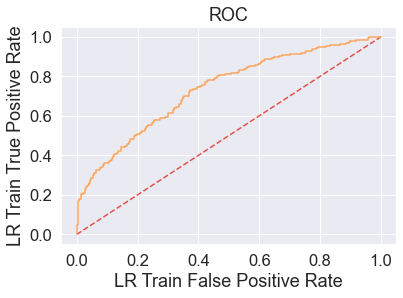

In [41]:
# predict probabilities
ytrain_predict_prob=LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob = ytrain_predict_prob[:, 1]
# calculate AUC
LR_train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
LR_train_fpr, LR_train_tpr, LR_train_thresholds = roc_curve(y_train, ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr)
plt.xlabel('LR Train False Positive Rate')
plt.ylabel('LR Train True Positive Rate')
plt.title('ROC')
plt.show()

In [42]:
#Train Data Accuracy
LR_train_acc=LR.score(X_train,y_train) 
round(LR_train_acc,3)

0.667

#### Testing set - LR

Accuracy for Logistic Regression model on Testing set is 
 0.649


Classification report for Logistic Regression model on Testing set is 
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



Confusion Matrix for Logistic Regression model on Testing set is


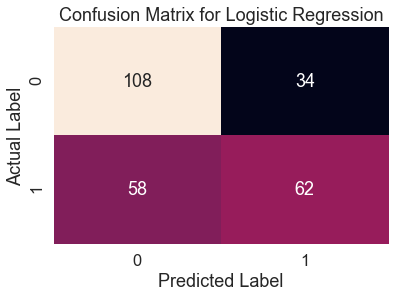

LR_test_precision  0.65
LR_test_recall  0.52
LR_test_f1  0.57


In [43]:
models_names={LR:'Logistic Regression'}

print('Accuracy for {} model on Testing set is'.format(models_names[LR]),'\n',round(accuracy_score(y_test,ytest_predict),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LR]),'\n',classification_report(y_test,ytest_predict))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LR]))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LR]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LR_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LR_metrics_test).transpose()
LR_test_f1=round(df.loc["1"][2],2)
LR_test_recall=round(df.loc["1"][1],2)
LR_test_precision=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

## AUC and ROC for the test data

AUC: 0.715


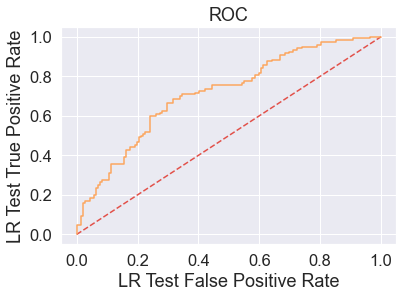

In [44]:
# predict probabilities
ytest_predict_prob=LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob = ytest_predict_prob[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = roc_curve(y_test, ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)
plt.xlabel('LR Test False Positive Rate')
plt.ylabel('LR Test True Positive Rate')
plt.title('ROC')
plt.show()

In [45]:
#Test Data Accuracy
LR_test_acc=LR.score(X_test,y_test) 
round(LR_test_acc,3)

0.649

## Logistic Regression Conclusion

Train Data:
AUC: %
Accuracy: %
Precision: %
f1-Score: %

Test Data:
AUC: %
Accuracy: %
Precision: %
f1-Score: %

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### Model Evaluation-LDA

#### Training set - LDA

Accuracy for Linear Discriminant Analysis model on Training set is 
 0.662


Classification report for Linear Discriminant Analysis model on Training set is 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



Confusion Matrix for Linear Discriminant Analysis model on Training set is


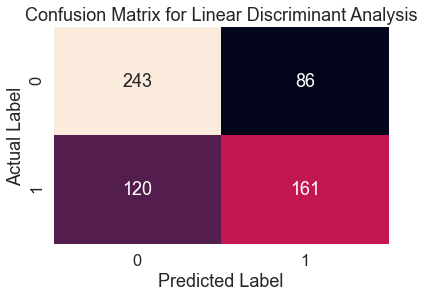

LDA_train_precision  0.65
LDA_train_recall  0.57
LDA_train_f1  0.61


In [46]:
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Training set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_train,pred_class_train),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[LDA]),'\n',classification_report(y_train,pred_class_train))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(df.loc["1"][2],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_precision=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

## AUC and ROC for the train data

AUC: 0.731


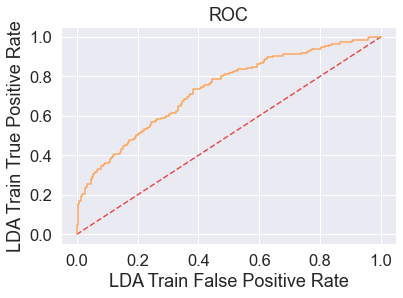

In [47]:
# predict probabilities
pred_prob_train = LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
pred_prob_train = pred_prob_train[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, pred_prob_train)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('LDA Train False Positive Rate')
plt.ylabel('LDA Train True Positive Rate')
plt.title('ROC')
plt.show()

In [48]:
#Train Data Accuracy
LDA_train_acc=LDA.score(X_train,y_train) 
round(LDA_train_acc,3)

0.662

#### Testing set - LDA

Accuracy for Linear Discriminant Analysis model on Testing set is 
 0.649


Classification report for Linear Discriminant Analysis model on Testing set is 
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



Confusion Matrix for Linear Discriminant Analysis model on Testing set is


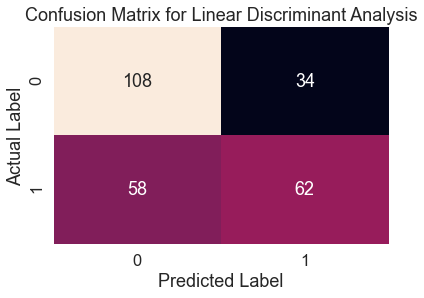

LDA_test_precision  0.65
LDA_test_recall  0.52
LDA_test_f1  0.57


In [49]:
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Testing set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_test,pred_class_test),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LDA]),'\n',classification_report(y_test,pred_class_test))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics_test=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(LDA_metrics_test).transpose()
LDA_test_f1=round(df.loc["1"][2],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_precision=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

## AUC and ROC for the test data

AUC: 0.714


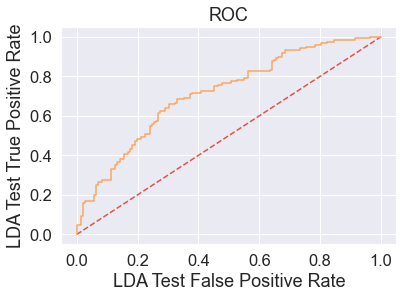

In [50]:
# predict probabilities
pred_prob_test = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, pred_prob_test)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('LDA Test False Positive Rate')
plt.ylabel('LDA Test True Positive Rate')
plt.title('ROC')
plt.show()

In [51]:
#Test Data Accuracy
LDA_test_acc=LDA.score(X_test,y_test) 
round(LDA_test_acc,3)

0.649

## Linear Discriminant Analysis Conclusion

Train Data:
AUC: %
Accuracy: %
Precision: %
f1-Score: %

Test Data:
AUC: %
Accuracy: %
Precision: %
f1-Score: %

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

In [52]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.65
AUC,0.73,0.72,0.73,0.71
Recall,0.58,0.52,0.57,0.52
Precision,0.66,0.65,0.65,0.65
F1 Score,0.62,0.57,0.61,0.57


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.4	Inference: Basis on these predictions, what are the insights and recommendations.

**To identify the best attributes, higher value of co-efficients will give high importance of a feature**

In [53]:
X.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign'],
      dtype='object')

In [54]:
np.round(LR.coef_,2)>0

array([[False, False,  True, False, False,  True]])

* **Years of formal education and foreigner would be the important factor to decide whether an employee decides to opt for a holiday package or not**
* **Since we have a fewer observations model accuracy was nearly low around 65% ,travel agency should try to collect more samples in order to get good insights.**